In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('data.csv', encoding='latin1')


C:\Users\admin\AppData\Local\Temp\ipykernel_29468\2220917043.py:1: DtypeWarning: Columns (0: stn_code) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='latin1')


In [7]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
x=df['no2']

In [12]:
x.head()

0    17.4
1     7.0
2    28.5
3    14.7
4     7.5
Name: no2, dtype: float64

my roll number =102303158

In [44]:
x_transformed=x+0.05*(102303158%7)*np.sin((0.3*((102303158%5)+1))*x)

In [45]:
x_transformed.head()

0    17.668863
1     7.256380
2    28.604985
3    14.419362
4     7.623636
Name: no2, dtype: float64

In [46]:
mean=np.mean(x_transformed)

In [47]:
var=np.var(x_transformed)

In [48]:
c=1/(np.sqrt(2*np.pi*var))

In [49]:
lambd=1/(2*var)

p̂(z) = c ∗ e^(−λ(z−μ)^2)


In [50]:
print(c)
print(mean)
print(var)
print(lambd)

0.021553581910602127
25.80305414141139
342.5951598811901
0.0014594485227794722


Text(0, 0.5, 'P(z)')

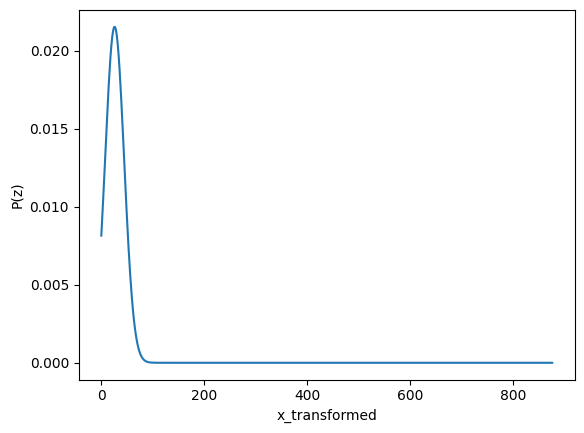

In [51]:
smoothed_z = np.linspace(min(x_transformed), max(x_transformed), 500)
plt.plot(smoothed_z,c*np.exp(-lambd*(smoothed_z-mean)**2))
plt.xlabel("x_transformed")
plt.ylabel("P(z)")
